## ICCLIM C4I: Calculate the averaged surface temperature anomaly and the same for precipitation anomaly over the period 2081-2100 compared to the period 1981-2000, and display delta-T delta-P diagram

Example notebook that runs ICCLIM, which is pre-installed in the notebook.

The example calculates the averaged temperature anomaly (using the TG indicator) vs the precipitation anomaly (using the PRCPTOT indicator) for the period 2081-2100 compared to the reference 1981-2000 for SSP 585 and several climate models. It needs the tas as well as the pr parameter chosen by the user on C4I.

The data is read using xarray and a plot of the a deltaT-deltaP diagram with data averaged over Europe is generated.

The datasets that are expected for this notebook are tas and pr parameters (needed to calculate the TG and PRCPTOT indicators respectively) for several climate models, for the historical (1981-2000) and future (2081-2100) SSP 585 experiment and for several climate models and one member. Daily data is used. In C4I, you can find all of the data needed in the CMIP6 project, at the **esgf-data3.ceda.ac.uk** and **esgf.nci.org.au** mirrors.

### Preparation of the needed modules

In [1]:
import icclim

import sys
import glob
import os
import datetime
import cftime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import nc_time_axis

print("python: ",sys.version)
print("numpy: ", np.__version__)
print("xarray: ", xr.__version__)
print("pandas: ", pd.__version__)
print("icclim: ", icclim.__version__)
print("cftime: ", cftime.__version__)

python:  3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
numpy:  1.20.3
xarray:  0.20.1
pandas:  1.3.5
icclim:  5.0.0rc2
cftime:  1.5.1.1


### Specification of the parameters and period of interest

The time period of interest as well as the reference period are defined here.
A list of models is listed here as an example.
Here we used Monthly data (Amon) but daily data could also be used.
The corresponding datafiles must have been selected by the user, containing both the studied and referenced periods.

icclim is then executed for both periods for each climate model separately.

In [2]:
# studied period
yearb = 2081
yeare = 2100
dt1 = datetime.datetime(yearb,1,1)
dt2 = datetime.datetime(yeare,12,31)

# reference period
yearrefb = 1981
yearrefe = 2000
dtr1 = datetime.datetime(yearrefb,1,1)
dtr2 = datetime.datetime(yearrefe,12,31)

# studied domain
# Western Europe
minlat = 30
maxlat = 56
minlon = -30
maxlon = 30

models=['ACCESS-CM2','BCC-CSM2-MR','CMCC-ESM2','GFDL-ESM4','INM-CM5-0','MPI-ESM1-2-LR']
out_f={}
out_hist_f={}
out_f_pr={}
out_hist_f_pr={}
files=[]
files_hist=[]
files_pr=[]
files_hist_pr=[]
for model in models:
  print("Processing model: "+model)
  out_f[model] = 'dtdp_tg_icclim_'+model+'.nc'
  out_hist_f[model] = 'dtdp_tg_icclim_'+model+'_hist.nc'
  out_f_pr[model] = 'dtdp_pr_icclim_'+model+'.nc'
  out_hist_f_pr[model] = 'dtdp_pr_icclim_'+model+'_hist.nc'
  files.append('dtdp_tg_icclim_'+model+'.nc')
  files_hist.append('dtdp_tg_icclim_'+model+'_hist.nc')
  files_pr.append('dtdp_prcptot_icclim_'+model+'.nc')
  files_hist_pr.append('dtdp_prcptot_icclim_'+model+'_hist.nc')
  #tas_day_INM-CM5-0_historical_r1i1p1f1_gr1_19500101-19991231.nc
  #tas_day_INM-CM5-0_historical_r1i1p1f1_gr1_20000101-20141231.nc
  #tas_day_INM-CM5-0_ssp585_r1i1p1f1_gr1_20650101-21001231.nc
  filenames_hist = glob.glob('./data/latest/tas_day_'+model+'_historical_*.nc')
  filenames_585 = glob.glob('./data/latest/tas_day_'+model+'_ssp585_*.nc')
  filenames_hist_pr = glob.glob('./data/latest/pr_day_'+model+'_historical_*.nc')
  filenames_585_pr = glob.glob('./data/latest/pr_day_'+model+'_ssp585_*.nc')
        
  icclim.index(index_name='TG', in_files=filenames_585, var_name='tas', slice_mode='year', time_range=[dt1, dt2], transfer_limit_Mbytes=200, out_file=out_f[model], logs_verbosity='LOW')
  icclim.index(index_name='TG', in_files=filenames_hist, var_name='tas', slice_mode='year', time_range=[dtr1, dtr2], transfer_limit_Mbytes=200, out_file=out_hist_f[model], logs_verbosity='LOW')
  icclim.index(index_name='PRCPTOT', in_files=filenames_585_pr, var_name='pr', slice_mode='year', time_range=[dt1, dt2], transfer_limit_Mbytes=200, out_file=out_f_pr[model], logs_verbosity='LOW')
  icclim.index(index_name='PRCPTOT', in_files=filenames_hist_pr, var_name='pr', slice_mode='year', time_range=[dtr1, dtr2], transfer_limit_Mbytes=200, out_file=out_hist_f_pr[model], logs_verbosity='LOW')

print("Processing finished.")

2022-01-12 16:40:23,408 --- icclim 5.0.0rc2
2022-01-12 16:40:23,409 --- BEGIN EXECUTION
2022-01-12 16:40:23,409 Processing: 0%


Processing model: ACCESS-CM2


2022-01-12 16:40:23,657 Calculating climate index: TG
2022-01-12 16:40:34,973 Processing: 100%
2022-01-12 16:40:34,974 --- icclim 5.0.0rc2
2022-01-12 16:40:34,974 --- CPU SECS = 18.675    
2022-01-12 16:40:34,974 --- END EXECUTION
2022-01-12 16:40:34,978 --- icclim 5.0.0rc2
2022-01-12 16:40:34,979 --- BEGIN EXECUTION
2022-01-12 16:40:34,979 Processing: 0%
2022-01-12 16:40:35,340 Calculating climate index: TG
2022-01-12 16:40:53,379 Processing: 100%
2022-01-12 16:40:53,380 --- icclim 5.0.0rc2
2022-01-12 16:40:53,381 --- CPU SECS = 43.113    
2022-01-12 16:40:53,381 --- END EXECUTION
2022-01-12 16:40:53,388 --- icclim 5.0.0rc2
2022-01-12 16:40:53,389 --- BEGIN EXECUTION
2022-01-12 16:40:53,389 Processing: 0%
2022-01-12 16:40:53,628 Calculating climate index: PRCPTOT
2022-01-12 16:41:03,159 Processing: 100%
2022-01-12 16:41:03,160 --- icclim 5.0.0rc2
2022-01-12 16:41:03,160 --- CPU SECS = 57.713    
2022-01-12 16:41:03,160 --- END EXECUTION
2022-01-12 16:41:03,164 --- icclim 5.0.0rc2
2022

Processing model: BCC-CSM2-MR


2022-01-12 16:41:20,067 Calculating climate index: TG
2022-01-12 16:41:25,325 Processing: 100%
2022-01-12 16:41:25,326 --- icclim 5.0.0rc2
2022-01-12 16:41:25,326 --- CPU SECS = 93.603    
2022-01-12 16:41:25,326 --- END EXECUTION
2022-01-12 16:41:25,329 --- icclim 5.0.0rc2
2022-01-12 16:41:25,330 --- BEGIN EXECUTION
2022-01-12 16:41:25,330 Processing: 0%
2022-01-12 16:41:28,705 Calculating climate index: TG
2022-01-12 16:41:34,538 Processing: 100%
2022-01-12 16:41:34,539 --- icclim 5.0.0rc2
2022-01-12 16:41:34,539 --- CPU SECS = 108.036   
2022-01-12 16:41:34,540 --- END EXECUTION
2022-01-12 16:41:34,543 --- icclim 5.0.0rc2
2022-01-12 16:41:34,544 --- BEGIN EXECUTION
2022-01-12 16:41:34,544 Processing: 0%
2022-01-12 16:41:36,612 Calculating climate index: PRCPTOT
2022-01-12 16:41:42,387 Processing: 100%
2022-01-12 16:41:42,388 --- icclim 5.0.0rc2
2022-01-12 16:41:42,388 --- CPU SECS = 126.235   
2022-01-12 16:41:42,389 --- END EXECUTION
2022-01-12 16:41:42,391 --- icclim 5.0.0rc2
2022

Processing model: CMCC-ESM2


2022-01-12 16:41:53,569 Calculating climate index: TG
2022-01-12 16:42:05,511 Processing: 100%
2022-01-12 16:42:05,512 --- icclim 5.0.0rc2
2022-01-12 16:42:05,512 --- CPU SECS = 173.419   
2022-01-12 16:42:05,513 --- END EXECUTION
2022-01-12 16:42:05,518 --- icclim 5.0.0rc2
2022-01-12 16:42:05,519 --- BEGIN EXECUTION
2022-01-12 16:42:05,520 Processing: 0%
2022-01-12 16:42:05,859 Calculating climate index: TG
2022-01-12 16:42:26,216 Processing: 100%
2022-01-12 16:42:26,216 --- icclim 5.0.0rc2
2022-01-12 16:42:26,217 --- CPU SECS = 209.656   
2022-01-12 16:42:26,217 --- END EXECUTION
2022-01-12 16:42:26,230 --- icclim 5.0.0rc2
2022-01-12 16:42:26,231 --- BEGIN EXECUTION
2022-01-12 16:42:26,231 Processing: 0%
2022-01-12 16:42:26,468 Calculating climate index: PRCPTOT
2022-01-12 16:42:43,592 Processing: 100%
2022-01-12 16:42:43,592 --- icclim 5.0.0rc2
2022-01-12 16:42:43,593 --- CPU SECS = 240.242   
2022-01-12 16:42:43,593 --- END EXECUTION
2022-01-12 16:42:43,599 --- icclim 5.0.0rc2
2022

Processing model: GFDL-ESM4


2022-01-12 16:43:01,776 Calculating climate index: TG
2022-01-12 16:43:10,299 Processing: 100%
2022-01-12 16:43:10,299 --- icclim 5.0.0rc2
2022-01-12 16:43:10,300 --- CPU SECS = 292.298   
2022-01-12 16:43:10,300 --- END EXECUTION
2022-01-12 16:43:10,306 --- icclim 5.0.0rc2
2022-01-12 16:43:10,306 --- BEGIN EXECUTION
2022-01-12 16:43:10,307 Processing: 0%
2022-01-12 16:43:11,063 Calculating climate index: TG
2022-01-12 16:43:21,635 Processing: 100%
2022-01-12 16:43:21,636 --- icclim 5.0.0rc2
2022-01-12 16:43:21,637 --- CPU SECS = 311.494   
2022-01-12 16:43:21,637 --- END EXECUTION
2022-01-12 16:43:21,644 --- icclim 5.0.0rc2
2022-01-12 16:43:21,645 --- BEGIN EXECUTION
2022-01-12 16:43:21,645 Processing: 0%
2022-01-12 16:43:22,189 Calculating climate index: PRCPTOT
2022-01-12 16:43:34,606 Processing: 100%
2022-01-12 16:43:34,607 --- icclim 5.0.0rc2
2022-01-12 16:43:34,607 --- CPU SECS = 335.834   
2022-01-12 16:43:34,607 --- END EXECUTION
2022-01-12 16:43:34,611 --- icclim 5.0.0rc2
2022

Processing model: INM-CM5-0


2022-01-12 16:44:02,393 Processing: 100%
2022-01-12 16:44:02,394 --- icclim 5.0.0rc2
2022-01-12 16:44:02,394 --- CPU SECS = 376.577   
2022-01-12 16:44:02,395 --- END EXECUTION
2022-01-12 16:44:02,400 --- icclim 5.0.0rc2
2022-01-12 16:44:02,401 --- BEGIN EXECUTION
2022-01-12 16:44:02,402 Processing: 0%
2022-01-12 16:44:02,614 Calculating climate index: TG
2022-01-12 16:44:10,278 Processing: 100%
2022-01-12 16:44:10,279 --- icclim 5.0.0rc2
2022-01-12 16:44:10,280 --- CPU SECS = 388.596   
2022-01-12 16:44:10,280 --- END EXECUTION
2022-01-12 16:44:10,287 --- icclim 5.0.0rc2
2022-01-12 16:44:10,287 --- BEGIN EXECUTION
2022-01-12 16:44:10,288 Processing: 0%
2022-01-12 16:44:10,412 Calculating climate index: PRCPTOT
2022-01-12 16:44:18,255 Processing: 100%
2022-01-12 16:44:18,255 --- icclim 5.0.0rc2
2022-01-12 16:44:18,256 --- CPU SECS = 400.218   
2022-01-12 16:44:18,256 --- END EXECUTION
2022-01-12 16:44:18,260 --- icclim 5.0.0rc2
2022-01-12 16:44:18,261 --- BEGIN EXECUTION
2022-01-12 16:

Processing model: MPI-ESM1-2-LR


2022-01-12 16:44:35,568 Processing: 100%
2022-01-12 16:44:35,568 --- icclim 5.0.0rc2
2022-01-12 16:44:35,569 --- CPU SECS = 426.275   
2022-01-12 16:44:35,569 --- END EXECUTION
2022-01-12 16:44:35,573 --- icclim 5.0.0rc2
2022-01-12 16:44:35,574 --- BEGIN EXECUTION
2022-01-12 16:44:35,574 Processing: 0%
2022-01-12 16:44:35,747 Calculating climate index: TG
2022-01-12 16:44:42,932 Processing: 100%
2022-01-12 16:44:42,932 --- icclim 5.0.0rc2
2022-01-12 16:44:42,933 --- CPU SECS = 436.455   
2022-01-12 16:44:42,933 --- END EXECUTION
2022-01-12 16:44:42,940 --- icclim 5.0.0rc2
2022-01-12 16:44:42,940 --- BEGIN EXECUTION
2022-01-12 16:44:42,941 Processing: 0%
2022-01-12 16:44:43,071 Calculating climate index: PRCPTOT
2022-01-12 16:44:48,631 Processing: 100%
2022-01-12 16:44:48,631 --- icclim 5.0.0rc2
2022-01-12 16:44:48,632 --- CPU SECS = 446.602   
2022-01-12 16:44:48,632 --- END EXECUTION
2022-01-12 16:44:48,637 --- icclim 5.0.0rc2
2022-01-12 16:44:48,637 --- BEGIN EXECUTION
2022-01-12 16:

Processing finished.


### Data preparation

Here all data is loaded in 2 separate variables, one containing all the historical periods for all the models, and the same for the future time period.

Extract geographical domain and deal with longitudes

In [3]:
# Open datasets
tg = []
tg_hist = []
pr = []
pr_hist = []
for model in models:
    dsl = xr.open_dataset(out_f[model], decode_times=False)
    dsl['time'] = xr.decode_cf(dsl).time
    dsl = dsl.assign_coords({'model_id':model})

    dslp = xr.open_dataset(out_f_pr[model], decode_times=False)
    dslp['time'] = xr.decode_cf(dslp).time
    dslp = dslp.assign_coords({'model_id':model})

    dshl = xr.open_dataset(out_hist_f[model], decode_times=False)
    dshl['time'] = xr.decode_cf(dshl).time
    dshl = dshl.assign_coords({'model_id':model})
    
    dshlp = xr.open_dataset(out_hist_f_pr[model], decode_times=False)
    dshlp['time'] = xr.decode_cf(dshlp).time
    dshlp = dshlp.assign_coords({'model_id':model})
    
# Reorder longitudes if needed and extract domain    
    if minlon > maxlon or minlon < 0:
        dsl = dsl.assign_coords(lon=(((dsl.lon + 180) % 360) - 180)).roll(lon=(dsl.dims['lon'] // 2), roll_coords=True)
        dslp = dslp.assign_coords(lon=(((dslp.lon + 180) % 360) - 180)).roll(lon=(dslp.dims['lon'] // 2), roll_coords=True)
        dshl = dshl.assign_coords(lon=(((dshl.lon + 180) % 360) - 180)).roll(lon=(dshl.dims['lon'] // 2), roll_coords=True)
        dshlp = dshlp.assign_coords(lon=(((dshlp.lon + 180) % 360) - 180)).roll(lon=(dshlp.dims['lon'] // 2), roll_coords=True)

        if minlon >= 180:
            minlon = minlon - 360
        if maxlon >= 180:
            maxlon = maxlon - 360
            
    dsl = dsl.sel(lon=slice(minlon,maxlon), lat=slice(minlat,maxlat))
    dslp = dslp.sel(lon=slice(minlon,maxlon), lat=slice(minlat,maxlat))
    dshl = dshl.sel(lon=slice(minlon,maxlon), lat=slice(minlat,maxlat))
    dshlp = dshlp.sel(lon=slice(minlon,maxlon), lat=slice(minlat,maxlat))
    
    tg.append(dsl['TG'])
    pr.append(dslp['PRCPTOT'])
    tg_hist.append(dshl['TG'])
    pr_hist.append(dshlp['PRCPTOT'])

### Perform spatial average on the extracted geographical domain

In [4]:
# Average different grids
for ii in range(len(tg)):
    tg[ii] = tg[ii].mean(dim=['lon','lat'])
for ii in range(len(pr)):
    pr[ii] = pr[ii].mean(dim=['lon','lat'])
for ii in range(len(tg_hist)):
    tg_hist[ii] = tg_hist[ii].mean(dim=['lon','lat'])
for ii in range(len(pr_hist)):
    pr_hist[ii] = pr_hist[ii].mean(dim=['lon','lat'])

### Define a function to align all different calendar types

In [5]:
# Define function to align different calendars using annual data
def to_pandas_dt(da):
    '''Takes an annual DataArray. Change the calendar to a pandas datetime.'''
    val = da.copy()
    #val.resample(time='Y').mean('time')
    timev = []
    years = [int(val) for val in da.time.dt.strftime("%Y")]
    for itime in range(val.sizes['time']):
      timev.append(years[itime])

    timevp = pd.to_datetime(timev, format="%Y")
    time1 = xr.DataArray(data=timevp, dims=["time"])
    time1.name = 'time'
    # We rename the time dimension and coordinate to time360 to make it clear it isn't 
    # the original time coordinate.
    val = val.rename({'time':'timepd'})
    time1 = time1.rename({'time':'timepd'})
    val = val.assign_coords({'timepd':time1})

    return val

### Align calendars of all input data

In [6]:
# Convert all calendars to annual precision (we have configured icclim to output yearly data)
ll = [to_pandas_dt(da) for da in tg]
llp = [to_pandas_dt(da) for da in pr]
ll_hist = [to_pandas_dt(da) for da in tg_hist]
llp_hist = [to_pandas_dt(da) for da in pr_hist]

# Concatenate all models into one
full_tg = xr.concat(ll, 'model_id', join='outer')
full_pr = xr.concat(llp, 'model_id', join='outer')
full_tg_hist = xr.concat(ll_hist, 'model_id', join='outer')
full_pr_hist = xr.concat(llp_hist, 'model_id', join='outer')
full_tg_anomaly = full_tg.mean(dim='timepd') - full_tg_hist.mean(dim='timepd')
full_pr_anomaly = (full_pr.mean(dim='timepd') - full_pr_hist.mean(dim='timepd'))/full_pr.mean(dim='timepd')*100.0

### Plot a multi-model scatter plot of the anomalies of temperature and precipitation of the future time period 2081-2100 SSP 585 compared to the historical period

Temperature and Precipitation anomalies for SSP585 of the period 2080-2100 vs 1981-2000.

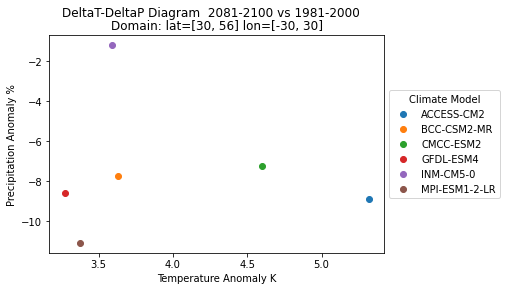

In [7]:
# Plot deltaT-deltaP diagram

# To use xarray scatter plot, create a new Dataset using both DataArrays
ds_anomaly = xr.Dataset({'TG': full_tg_anomaly, 'PRCPTOT': full_pr_anomaly})

# Scatter Plot
xr.plot.scatter(ds_anomaly, 'TG', 'PRCPTOT', hue='model_id')
plt.suptitle("DeltaT-DeltaP Diagram  "+str(yearb)+"-"+str(yeare)+" vs "+str(yearrefb)+"-"+str(yearrefe))
plt.title("Domain: lat=["+str(minlat)+", "+str(maxlat)+"] lon=["+str(minlon)+", "+str(maxlon)+"]")
plt.ylabel("Precipitation Anomaly %")
plt.xlabel("Temperature Anomaly K")
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Climate Model')